In [ ]:
# Exploration des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#chargement des donnees
df = pd.read_csv('Financial_inclusion_dataset.csv')
#apercu des donnees
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [2]:
#infos generales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
#statistiques descriptives
df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
#rapport de profilage pandas
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title="rapport de profilage pandas",explorative=True)
profile.to_file("rapport_profilage.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:01<00:00,  7.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#valeurs manquentes
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [14]:
#verification des doublons
df.duplicated().sum()

0

In [15]:
#verification des valeurs abberantes
df[["household_size", "age_of_respondent","year"]].describe()

,household_size,age_of_respondent,year
count,23524.000000,23524.000000,23524.000000
mean,3.797483,38.805220,2016.975939
std,2.227613,16.520569,0.847371
min,1.000000,16.000000,2016.000000
25%,2.000000,26.000000,2016.000000
50%,3.000000,35.000000,2017.000000
75%,5.000000,49.000000,2018.000000
max,21.000000,100.000000,2018.000000


In [ ]:
#on ne constate pas de valeurs abberantes car cest statistiques correspondnt typiquement a la population africaine

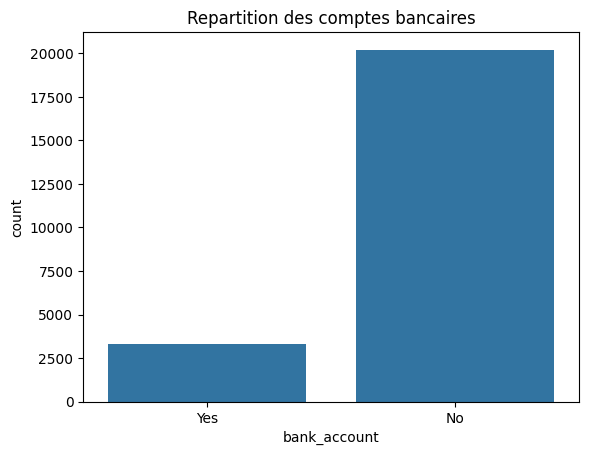

In [9]:
#visualisation des classes cibles
sns.countplot(data=df,x="bank_account")
plt.title("Repartition des comptes bancaires")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Copie du DataFrame
df_encoded = df.copy()

# Colonnes à ne pas encoder
colonnes_numeriques = ['year', 'age_of_respondent', 'household_size']
colonnes_a_ignorer = ['bank_account', 'uniqueid']

# Encodage des colonnes catégorielles (sauf uniqueid)
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col not in colonnes_a_ignorer:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le

# Définir X et y
X = df_encoded.drop(['bank_account', 'uniqueid'], axis=1)
y = df_encoded['bank_account']

# Division entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
print("Précision:", accuracy_score(y_test, y_pred))
print("Rapport de classification:\n", classification_report(y_test, y_pred))

# Sauvegarde des encodeurs
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Sauvegarde du modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


Précision: 0.8814027630180659
Rapport de classification:
               precision    recall  f1-score   support

          No       0.91      0.96      0.93      4063
         Yes       0.61      0.36      0.46       642

    accuracy                           0.88      4705
   macro avg       0.76      0.66      0.69      4705
weighted avg       0.87      0.88      0.87      4705



Le modèle de Random_FOREST présente une bonne précision globale de 88 %, ce qui signifie qu'il prédit correctement la majorité des cas. Plus précisément, il est très performant pour prédire les clients qui ne souscrivent pas au produit bancaire ("No"), avec une précision de 91 % et un rappel de 96 %. En revanche, il a plus de difficulté à identifier les clients susceptibles de souscrire ("Yes"), avec une précision de 61 % et un rappel assez faible de 36 %.

Cette asymétrie peut s'expliquer non seulement par un déséquilibre des classes, mais aussi par des facteurs sociologiques liés au contexte africain :

Dans de nombreux pays africains, la méfiance envers les institutions bancaires, le manque d'éducation financière, ou encore le niveau de vie souvent modeste peuvent influencer négativement la propension à souscrire à des produits financiers.

Ainsi, le modèle reproduit sans doute une réalité sociale dans laquelle la majorité de la population ciblée n’est pas encline à souscrire à une offre bancaire, ce qui justifie une performance élevée pour la classe "No", mais plus faible pour "Yes", qui est minoritaire.